In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.style as style

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score, roc_auc_score, roc_curve
)

import warnings

# Configuraciones
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [9]:
df = pd.read_csv("../0_data/1_processed/partidos_limpios.csv")
df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Age_Player1,Age_Player2
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2,1970.0,1979.0
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6,1977.0,1974.0
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3,1976.0,1979.0
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6,1975.0,1981.0
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4,1970.0,1971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62324,Winston-Salem Open at Wake Forest University,2025-08-20,ATP250,Outdoor,Hard,3rd Round,3,Munar J.,Sonego L.,Munar J.,46,35,1077,1315,1.67,2.20,4-6 6-4 6-1,1997.0,1995.0
62325,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,3rd Round,3,Van De Zandschulp B.,Baez S.,Van De Zandschulp B.,92,40,684,1160,1.44,2.75,0-6 6-1 6-4,1995.0,2000.0
62326,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,Quarterfinals,3,Kecmanovic M.,Korda S.,Korda S.,45,86,1086,735,2.10,1.73,1-6 4-6,1999.0,2000.0
62327,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,Quarterfinals,3,Fucsovics M.,Munar J.,Fucsovics M.,94,46,679,1077,2.10,1.73,7-5 6-3,1992.0,1997.0


In [10]:
df["Rank_Diff"] = df["Rank_1"] - df["Rank_2"]
df

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Age_Player1,Age_Player2,Rank_Diff
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.00,-1.00,6-4 6-2,1970.0,1979.0,-14
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.00,-1.00,3-6 3-6,1977.0,1974.0,51
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.00,-1.00,6-7 7-5 6-3,1976.0,1979.0,-615
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.00,-1.00,1-6 4-6,1975.0,1981.0,22
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.00,-1.00,7-6 5-7 6-4,1970.0,1971.0,-117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62324,Winston-Salem Open at Wake Forest University,2025-08-20,ATP250,Outdoor,Hard,3rd Round,3,Munar J.,Sonego L.,Munar J.,46,35,1077,1315,1.67,2.20,4-6 6-4 6-1,1997.0,1995.0,11
62325,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,3rd Round,3,Van De Zandschulp B.,Baez S.,Van De Zandschulp B.,92,40,684,1160,1.44,2.75,0-6 6-1 6-4,1995.0,2000.0,52
62326,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,Quarterfinals,3,Kecmanovic M.,Korda S.,Korda S.,45,86,1086,735,2.10,1.73,1-6 4-6,1999.0,2000.0,-41
62327,Winston-Salem Open at Wake Forest University,2025-08-21,ATP250,Outdoor,Hard,Quarterfinals,3,Fucsovics M.,Munar J.,Fucsovics M.,94,46,679,1077,2.10,1.73,7-5 6-3,1992.0,1997.0,48


In [11]:
df["Player_1"] = df["Player_1"].str.strip()

In [12]:
# Target Variable (Y): 1 si Jugador 1 gana, 0 si Jugador 2 gana
df['Target'] = (df['Winner'] == df['Player_1']).astype(int)

In [ ]:
# --- 1. Mapeo Ordinal para 'Series' (Importancia del Torneo) ---
series_mapping = {
    'ATP250': 1,
    'International': 1,    
    'International Gold': 2,
    'ATP500': 2,
    'Masters': 3,
    'Masters 1000': 3,
    'Masters Cup': 4,
    'Grand Slam': 5
}

df['Series_Ordinal'] = df['Series'].map(series_mapping)

# --- 2. Mapeo Ordinal para 'Round' (Etapa del Torneo) ---
# Escala: 1 (Round Robin) -> 2 (1st Round) -> ... -> 8 (The Final)
round_mapping = {
    'Round Robin': 1,
    '1st Round': 1,
    '2nd Round': 2,
    '3rd Round': 3,
    '4th Round': 4,
    'Quarterfinals': 5,
    'Semifinals': 6,
    'The Final': 7
}

df['Round_Ordinal'] = df['Round'].map(round_mapping)

In [15]:
# 2. Formato de Fecha (Crucial para ordenamiento cronológico)
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# 3. Codificación Binaria/OHE: Surface, Court, Best of ---
# Surface: One-Hot Encoding (OHE)
df = pd.concat([df, pd.get_dummies(df['Surface'], prefix='Surface', dtype=int)], axis=1)

# Court: Binaria (1 para Indoor, 0 para Outdoor)
df['Court_Indoor'] = (df['Court'] == 'Indoor').astype(int)

# Best of: Binaria (1 para 5 sets, 0 para 3 sets)
df['Best_of_5'] = (df['Best of'] == 5).astype(int)

In [17]:
df["Age_Diff"] = df["Age_Player1"] - df["Age_Player2"]

In [18]:
df["Target"].value_counts(normalize=True)

Target
0    0.500008
1    0.499992
Name: proportion, dtype: float64

In [ ]:
# FEATURE DINÁMICA: FORMA RECIENTE (WINS LAST 5 DIFF)

p1_log = df[['Date', 'Player_1', 'Target']].rename(columns={'Player_1': 'Player', 'Target': 'Win_Flag'})
p2_log = df[['Date', 'Player_2', 'Target']].rename(columns={'Player_2': 'Player', 'Target': 'P1_Win_Flag'})
p2_log['Win_Flag'] = 1 - p2_log['P1_Win_Flag']
p2_log.drop(columns=['P1_Win_Flag'], inplace=True)

player_match_log = pd.concat([p1_log, p2_log], ignore_index=True)
player_match_log.sort_values(by=['Player', 'Date'], inplace=True)

# Calcular Victorias en la Ventana Móvil de 5 Partidos
player_match_log['P_Wins_Last_5'] = (
    player_match_log
    .groupby('Player')['Win_Flag']
    .rolling(window=5, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
    .shift(1) # Desplazar 1 para asegurar la retrospectividad
    .fillna(0)
)

#Eliminar duplicados antes del merge
# Mantener la primera ocurrencia de cada (Date, Player)
player_match_log = player_match_log.drop_duplicates(subset=['Date', 'Player'], keep='first').reset_index(drop=True)

# Merge la forma reciente de vuelta al DF original
df = df.merge(player_match_log[['Date', 'Player', 'P_Wins_Last_5']], left_on=['Date', 'Player_1'], right_on=['Date', 'Player'], how='left').rename(columns={'P_Wins_Last_5': 'P1_Wins_Last_5'}).drop(columns=['Player'])
df = df.merge(player_match_log[['Date', 'Player', 'P_Wins_Last_5']], left_on=['Date', 'Player_2'], right_on=['Date', 'Player'], how='left').rename(columns={'P_Wins_Last_5': 'P2_Wins_Last_5'}).drop(columns=['Player'])

# Crear la Feature de Diferencia Final
df['Wins_Last_5_Diff'] = df['P1_Wins_Last_5'].fillna(0) - df['P2_Wins_Last_5'].fillna(0)

In [21]:
def calculate_h2h(df):
    """
    Calcula el historial Head-to-Head (H2H) para cada partido.
    El resultado es: (Victorias de Player_1 vs Player_2) - (Victorias de Player_2 vs Player_1)
    """
    h2h_df = df[['Date', 'Player_1', 'Player_2', 'Winner']].copy()
    
    # Inicializar la columna de H2H
    df['H2H_Advantage'] = 0.0
    
    # Crear un diccionario para almacenar los resultados históricos (PlayerA vs PlayerB)
    # La llave será una tupla ordenada (min(A, B), max(A, B))
    historical_h2h = {} 

    for index, row in h2h_df.iterrows():
        p1 = row['Player_1']
        p2 = row['Player_2']
        winner = row['Winner']

        # Crear la llave canónica para el par de jugadores (asegura que A vs B sea igual a B vs A)
        players_key = tuple(sorted((p1, p2)))

        # Obtener el historial actual o inicializarlo
        # El historial es: [Victorias_P1, Victorias_P2]
        h2h_record = historical_h2h.get(players_key, {p1: 0, p2: 0})
        
        # 1. Aplicar la Feature (antes de actualizar el historial)
        # La ventaja H2H se calcula desde la perspectiva de Player_1:
        # H2H_Advantage = Victorias_P1 - Victorias_P2
        
        # Primero, obtener los conteos de victorias del diccionario
        wins_p1 = h2h_record.get(p1, 0)
        wins_p2 = h2h_record.get(p2, 0)

        # Si el key está en orden P1, P2, usarlo directamente
        if p1 == players_key[0]:
            df.loc[index, 'H2H_Advantage'] = wins_p1 - wins_p2
        # Si el key está en orden P2, P1, hay que invertir el signo
        else:
            df.loc[index, 'H2H_Advantage'] = wins_p2 - wins_p1

        # 2. Actualizar el historial para el próximo partido
        if winner == p1:
            h2h_record[p1] = h2h_record.get(p1, 0) + 1
        elif winner == p2:
            h2h_record[p2] = h2h_record.get(p2, 0) + 1
            
        # Guardar el nuevo historial
        historical_h2h[players_key] = h2h_record

    return df

# Aplica la función
df = calculate_h2h(df.copy())

In [ ]:
def calculate_recent_form(df, n_matches=10):
    """
    Calcula el porcentaje de victorias en los últimos N partidos para cada jugador.
    """
    
    # Crear un DataFrame para registrar el historial de victorias y partidos jugados de cada jugador
    player_history = {} 
    
    # Inicializar las columnas de forma reciente
    df['P1_Recent_Win_Pct'] = 0.0
    df['P2_Recent_Win_Pct'] = 0.0

    for index, row in df.iterrows():
        p1 = row['Player_1']
        p2 = row['Player_2']
        winner = row['Winner']

        # --- Calcular la Feature (antes de actualizar el historial) ---
        
        # Función auxiliar para obtener el % de victorias en los últimos N partidos
        def get_win_pct(player):
            if player not in player_history:
                return 0.0 # Si no hay historial, el porcentaje es 0
            
            # Historial es una lista de 1 (victoria) o 0 (derrota), limitada a los últimos N
            history = player_history[player]
            if not history:
                 return 0.0
            
            # Suma de victorias / número de partidos jugados
            return sum(history) / len(history)

        # Aplicar el porcentaje de victorias reciente
        df.loc[index, 'P1_Recent_Win_Pct'] = get_win_pct(p1)
        df.loc[index, 'P2_Recent_Win_Pct'] = get_win_pct(p2)
        
        # --- Actualizar el Historial ---

        # P1: agregar resultado y limitar a N
        p1_result = 1 if winner == p1 else 0
        if p1 not in player_history:
            player_history[p1] = []
        player_history[p1].append(p1_result)
        if len(player_history[p1]) > n_matches:
            player_history[p1].pop(0) # Eliminar el más antiguo

        # P2: agregar resultado y limitar a N
        p2_result = 1 if winner == p2 else 0
        if p2 not in player_history:
            player_history[p2] = []
        player_history[p2].append(p2_result)
        if len(player_history[p2]) > n_matches:
            player_history[p2].pop(0) # Eliminar el más antiguo

    return df

# Aplica la función (usando 10 partidos como N por defecto)
df = calculate_recent_form(df.copy(), n_matches=10)

df['Recent_Form_10_Diff'] = df['P1_Recent_Win_Pct'] - df['P2_Recent_Win_Pct']

In [23]:
def calculate_elo(df, initial_elo=1500, k_factor=32, d_factor=400):
    """
    Calcula el Elo Rating para todos los jugadores a lo largo del tiempo.
    El cálculo se hace estrictamente por orden cronológico.
    """
    
    # 1. Preparación de datos (reasegurar orden y tipo de fecha)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date').reset_index(drop=True)
    
    # 2. Inicializar scores y listas de resultados
    player_elos = {} # Diccionario para almacenar el Elo actual de cada jugador
    
    # Inicializar columnas para las nuevas features
    df['P1_Elo_Before'] = 0.0
    df['P2_Elo_Before'] = 0.0

    # 3. Iterar cronológicamente y calcular/actualizar el Elo
    for index, row in df.iterrows():
        p1 = row['Player_1']
        p2 = row['Player_2']
        winner = row['Winner']

        # Asegurar que ambos jugadores tengan un Elo inicial
        if p1 not in player_elos:
            player_elos[p1] = initial_elo
        if p2 not in player_elos:
            player_elos[p2] = initial_elo

        # Obtener los Elos actuales
        r_p1 = player_elos[p1]
        r_p2 = player_elos[p2]
        
        # 4. Aplicar la Feature (Elos ANTES del partido)
        df.loc[index, 'P1_Elo_Before'] = r_p1
        df.loc[index, 'P2_Elo_Before'] = r_p2
        
        # 5. Calcular la Puntuación Esperada (E)
        # E = 1 / (1 + 10^((R_oponente - R_propio) / D))
        e_p1 = 1 / (1 + 10**((r_p2 - r_p1) / d_factor))
        e_p2 = 1 / (1 + 10**((r_p1 - r_p2) / d_factor))

        # 6. Definir la Puntuación Real (S)
        # S = 1 (Victoria) o 0 (Derrota)
        s_p1 = 1.0 if winner == p1 else 0.0
        s_p2 = 1.0 if winner == p2 else 0.0
        
        # 7. Actualizar el Elo (R' = R + K * (S - E))
        player_elos[p1] = r_p1 + k_factor * (s_p1 - e_p1)
        player_elos[p2] = r_p2 + k_factor * (s_p2 - e_p2)

    # 8. Crear la feature de diferencia (la más predictiva)
    df['Elo_Diff'] = df['P1_Elo_Before'] - df['P2_Elo_Before']
    
    return df

# --- Ejecución ---

# Aplica la función Elo
df = calculate_elo(df)

In [ ]:
def calculate_elo_surface(df, initial_elo=1500, k_factor=32, d_factor=400):
    """
    Calcula el Elo Rating para cada jugador a lo largo del tiempo,
    manteniendo scores separados para cada superficie (Surface).

    El resultado es: (P1 Elo en la superficie) - (P2 Elo en la superficie).
    """
    
    # 1. Preparación de datos (asegura el orden cronológico estricto)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date').reset_index(drop=True)
    
    # 2. Inicializar scores: Diccionario anidado {Superficie: {Jugador: Elo}}
    player_elos = {
        'Hard': {},
        'Clay': {},
        'Grass': {},
        'Carpet': {} 
    }
    
    # Inicializar columnas para las nuevas features
    df['P1_Elo_Surface'] = 0.0
    df['P2_Elo_Surface'] = 0.0

    # 3. Iterar cronológicamente y calcular/actualizar el Elo
    for index, row in df.iterrows():
        p1 = row['Player_1']
        p2 = row['Player_2']
        winner = row['Winner']
        surface = row['Surface'] # Leer la superficie del partido actual
        
        # Obtener la referencia al diccionario de Elo de la superficie actual
        elos_on_surface = player_elos[surface]
        
        # Asegurar que ambos jugadores tengan un Elo inicial en esta superficie
        if p1 not in elos_on_surface:
            elos_on_surface[p1] = initial_elo
        if p2 not in elos_on_surface:
            elos_on_surface[p2] = initial_elo

        # Obtener los Elos actuales (ANTES del partido)
        r_p1 = elos_on_surface[p1]
        r_p2 = elos_on_surface[p2]
        
        # 4. Aplicar la Feature (Elos ANTES del partido)
        df.loc[index, 'P1_Elo_Surface'] = r_p1
        df.loc[index, 'P2_Elo_Surface'] = r_p2
        
        # 5. Calcular la Puntuación Esperada (E)
        e_p1 = 1 / (1 + 10**((r_p2 - r_p1) / d_factor))
        e_p2 = 1 / (1 + 10**((r_p1 - r_p2) / d_factor))

        # 6. Definir la Puntuación Real (S)
        s_p1 = 1.0 if winner == p1 else 0.0
        s_p2 = 1.0 if winner == p2 else 0.0
        
        # 7. Actualizar el Elo y guardarlo en el diccionario de la superficie
        elos_on_surface[p1] = r_p1 + k_factor * (s_p1 - e_p1)
        elos_on_surface[p2] = r_p2 + k_factor * (s_p2 - e_p2)

    # 8. Crear la feature de diferencia
    df['Elo_Surface_Diff'] = df['P1_Elo_Surface'] - df['P2_Elo_Surface']
    
    return df

# --- Ejecución ---
# La función 'calculate_elo' ya debe haber ordenado el DF por fecha.
df = calculate_elo_surface(df.copy())

In [26]:
def calculate_dynamic_titles(df, player_col, win_col, new_col_name):
    """
    Calcula el total de títulos ganados por un jugador hasta el partido anterior (retrospectivo).
    """
    
    # 1. Crear un DF temporal solo con los datos necesarios y el índice
    df_temp = df[[player_col, 'Date', win_col]].copy()
    
    # 2. Ordenar por jugador y fecha, y resetear índice
    df_temp = df_temp.sort_values(by=[player_col, 'Date']).reset_index()
    
    # 3. Calcular la suma acumulativa (Títulos en cada partido)
    df_temp['Titles_Acum'] = df_temp.groupby(player_col)[win_col].cumsum()
    
    # 4. Aplicar SHIFT(1): El jugador solo tiene los títulos GANADOS HASTA ANTES de este partido.
    df_temp[new_col_name] = df_temp.groupby(player_col)['Titles_Acum'].shift(1).fillna(0)
    
    # 5. Fusionar de nuevo al DF original usando el índice original ('index')
    # Nos aseguramos de que solo la columna de resultado se fusione
    df = df.merge(
        df_temp[['index', new_col_name]],
        on='index', 
        how='left'
    )
    
    # 6. Devolver el DF
    return df

In [ ]:
# Asegurarse de que el DF tenga una columna 'index' antes de llamar
df = df.reset_index(names='index') 

# --- A. Corregir Títulos de Torneo (Todos) ---

# 1. Marcar si una fila representa una victoria en una final
df['Title_Win'] = (df['Round_Ordinal'] == 7).astype(int) 
df['P1_Title_Won'] = ((df['Winner'] == df['Player_1']) & (df['Title_Win'] == 1)).astype(int)
df['P2_Title_Won'] = ((df['Winner'] == df['Player_2']) & (df['Title_Win'] == 1)).astype(int)

# 2. Aplicar la lógica dinámica
df = calculate_dynamic_titles(df, 'Player_1', 'P1_Title_Won', 'P1_Tournament_Titles_Dynamic')
df = calculate_dynamic_titles(df, 'Player_2', 'P2_Title_Won', 'P2_Tournament_Titles_Dynamic')

df['Tournament_Titles_Diff_Dynamic'] = df['P1_Tournament_Titles_Dynamic'] - df['P2_Tournament_Titles_Dynamic']

# --- B. Corregir Títulos Grandes (Grand Slams y Masters Cup) ---

# 1. Marcar si una fila representa una victoria en una final GRANDE (Series_Ordinal >= 4)
df['Grand_Title_Win'] = ((df['Round_Ordinal'] == 7) & (df['Series_Ordinal'] >= 4)).astype(int)
df['P1_Grand_Title_Won'] = ((df['Winner'] == df['Player_1']) & (df['Grand_Title_Win'] == 1)).astype(int)
df['P2_Grand_Title_Won'] = ((df['Winner'] == df['Player_2']) & (df['Grand_Title_Win'] == 1)).astype(int)

# 2. Aplicar la lógica dinámica
df = calculate_dynamic_titles(df, 'Player_1', 'P1_Grand_Title_Won', 'P1_Grand_Titles_Dynamic')
df = calculate_dynamic_titles(df, 'Player_2', 'P2_Grand_Title_Won', 'P2_Grand_Titles_Dynamic')

df['Grand_Titles_Diff_Dynamic'] = df['P1_Grand_Titles_Dynamic'] - df['P2_Grand_Titles_Dynamic']

# 3. Eliminar columnas auxiliares y estáticas viejas
df = df.drop(columns=[
    'P1_Tournament_Titles', 'P2_Tournament_Titles', 'Tournament_Titles_Diff', 
    'P1_Grand_Titles', 'P2_Grand_Titles', 'Grand_Titles_Diff'
], errors='ignore')

In [46]:
df.to_csv('../0_data/1_processed/partidos_final.csv', index=False)

In [31]:
df.columns

Index(['index', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Best of', 'Player_1', 'Player_2', 'Winner', 'Rank_1', 'Rank_2',
       'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2', 'Score', 'Age_Player1',
       'Age_Player2', 'Rank_Diff', 'Target', 'Series_Ordinal', 'Round_Ordinal',
       'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Hard',
       'Court_Indoor', 'Best_of_5', 'Age_Diff', 'P1_Wins_Last_5',
       'P2_Wins_Last_5', 'Wins_Last_5_Diff', 'H2H_Advantage',
       'P1_Recent_Win_Pct', 'P2_Recent_Win_Pct', 'Recent_Form_10_Diff',
       'P1_Elo_Before', 'P2_Elo_Before', 'Elo_Diff', 'P1_Elo_Surface',
       'P2_Elo_Surface', 'Elo_Surface_Diff', 'Title_Win', 'P1_Title_Won',
       'P2_Title_Won', 'P1_Tournament_Titles_Dynamic',
       'P2_Tournament_Titles_Dynamic', 'Tournament_Titles_Diff_Dynamic',
       'Grand_Title_Win', 'P1_Grand_Title_Won', 'P2_Grand_Title_Won',
       'P1_Grand_Titles_Dynamic', 'P2_Grand_Titles_Dynamic',
       'Grand_Titles_Diff_

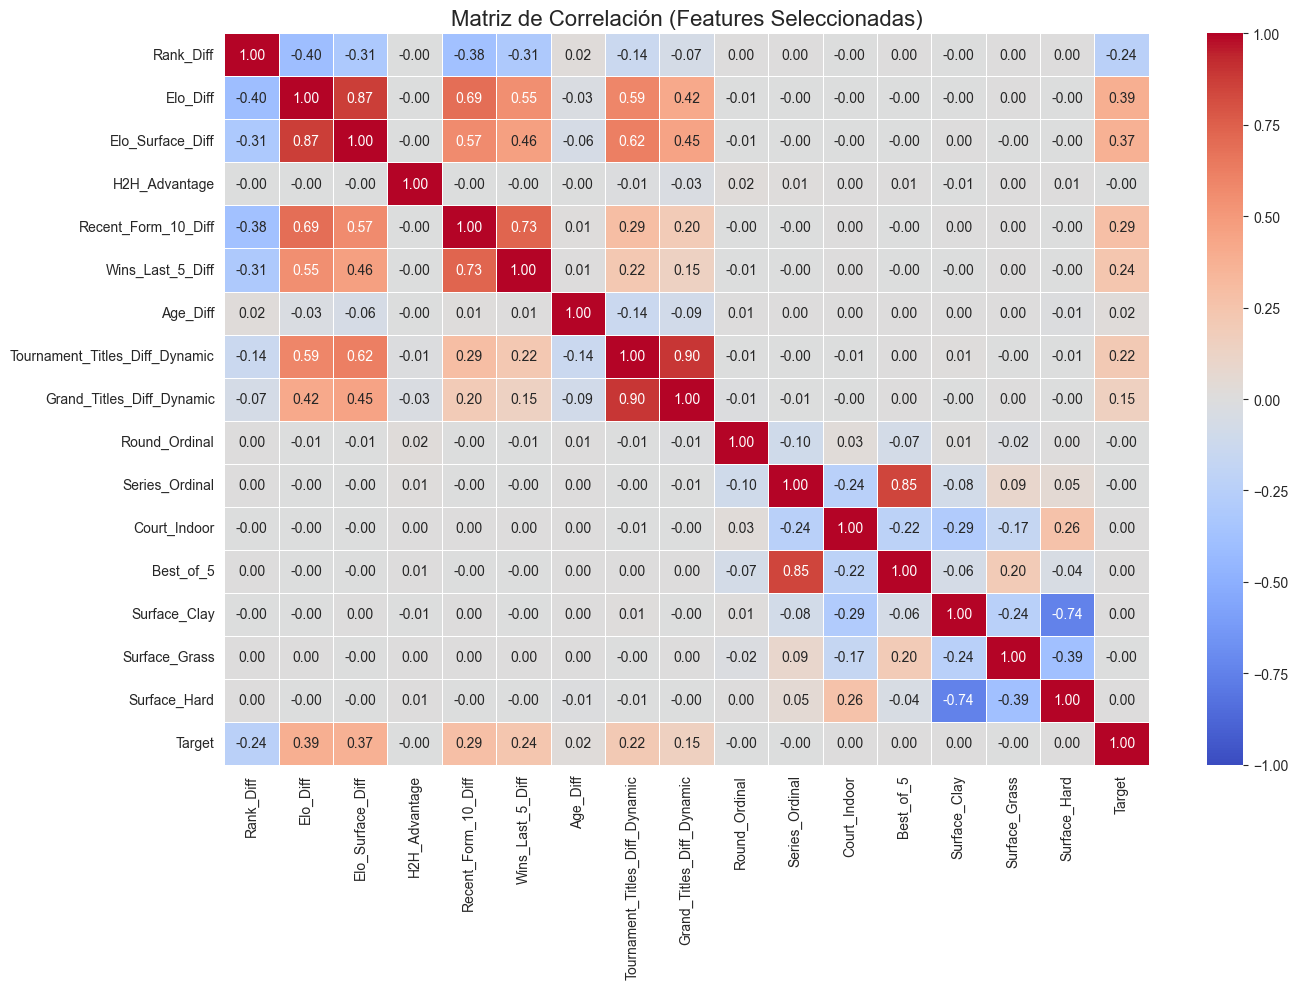

In [32]:
# 2. Definir la lista de features más relevantes
selected_features = [
    'Rank_Diff',
    'Elo_Diff',
    'Elo_Surface_Diff',  # NUEVA
    'H2H_Advantage',
    'Recent_Form_10_Diff',
    'Wins_Last_5_Diff',
    'Age_Diff',
    'Tournament_Titles_Diff_Dynamic',
    'Grand_Titles_Diff_Dynamic', # NUEVA
    'Round_Ordinal',
    'Series_Ordinal',
    'Court_Indoor',
    'Best_of_5',
    'Surface_Clay',
    'Surface_Grass',
    'Surface_Hard',
    'Target'
]

# 3. Generar el heatmap enfocado
df_heatmap = df[selected_features].copy()
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_heatmap.corr(),
    annot=True, 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1,
    fmt=".2f",
    linewidths=.5,
)
plt.title('Matriz de Correlación (Features Seleccionadas)', fontsize=16)
plt.tight_layout()
plt.show()

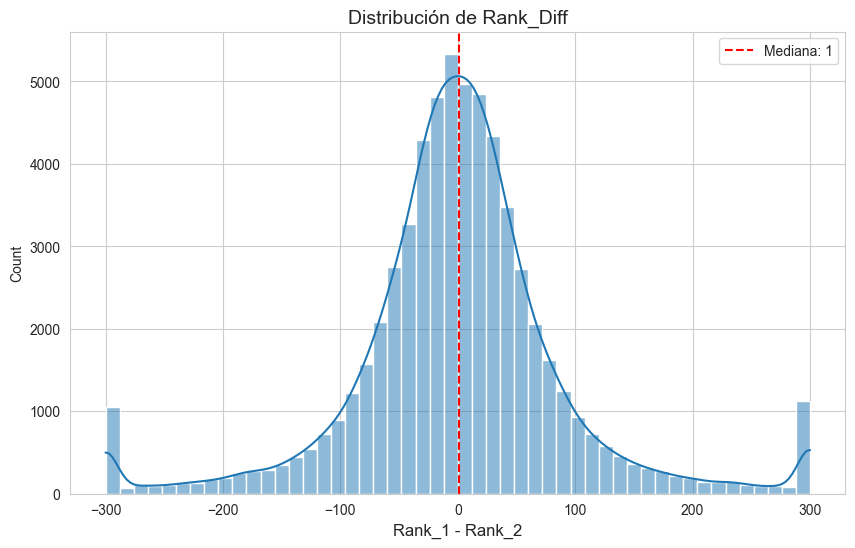

In [33]:
# 1. Definir la columna para visualizar y limitar outliers (visualización más limpia)
rank_diff_clipped = df['Rank_Diff'].clip(lower=-300, upper=300)

plt.figure(figsize=(10, 6))
sns.histplot(rank_diff_clipped, bins=50, kde=True)
plt.title('Distribución de Rank_Diff', fontsize=14)
plt.xlabel('Rank_1 - Rank_2', fontsize=12)
plt.axvline(df['Rank_Diff'].median(), color='red', linestyle='--', label=f'Mediana: {df["Rank_Diff"].median():.0f}')
plt.legend()
plt.show()

In [34]:
#Gráfico: Distribución de Rank_Diff 
# ¿La mayoría de los valores se agrupan alrededor de 0?
# El histograma muestra una distribución fuertemente concentrada cerca del eje 0.
# Significado: La mayoría de los partidos del circuito ATP se dan entre jugadores de niveles de ranking similares 
# (la diferencia suele ser menor a $\pm 100$). 
# Lla diferencia de ranking es pequeña en la mayoría de los casos.
# ¿Hay muchos valores extremos (partidos muy desiguales)?
# Aunque la distribución es densa en el centro, las colas del histograma se extienden significativamente hasta el límite del recorte
# Significado: Los partidos muy desiguales existen y representan outliers de victoria casi segura.

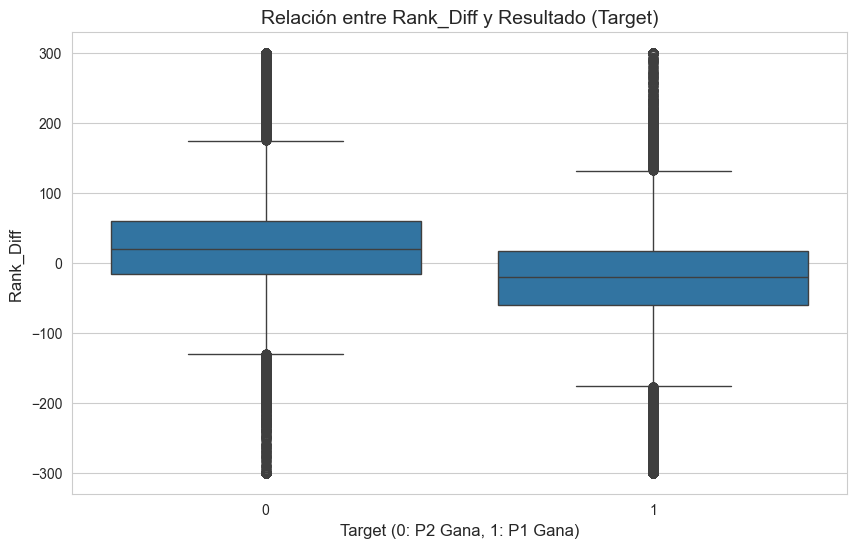

In [35]:
# Definir la columna de Rank_Diff con el mismo recorte para mantener la coherencia
rank_diff_clipped = df['Rank_Diff'].clip(lower=-300, upper=300)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y=rank_diff_clipped, data=df)
plt.title('Relación entre Rank_Diff y Resultado (Target)', fontsize=14)
plt.xlabel('Target (0: P2 Gana, 1: P1 Gana)', fontsize=12)
plt.ylabel('Rank_Diff ', fontsize=12)
plt.show()

In [ ]:
#Qué buscar: ¿La mediana de Rank_Diff para Target1 está en territorio negativo?
# Sí
# Target 1 (P1 Gana): La mediana (línea central de la caja derecha) se encuentra en territorio negativo
# Esto confirma que cuando P1 gana, en promedio, era el jugador con mejor ranking.
# Target 0 (P2 Gana): La mediana (línea central de la caja izquierda) se encuentra en territorio positivo  
# Conclusión: Esta es una feature extremadamente predictiva y funciona tal como se esperaba.

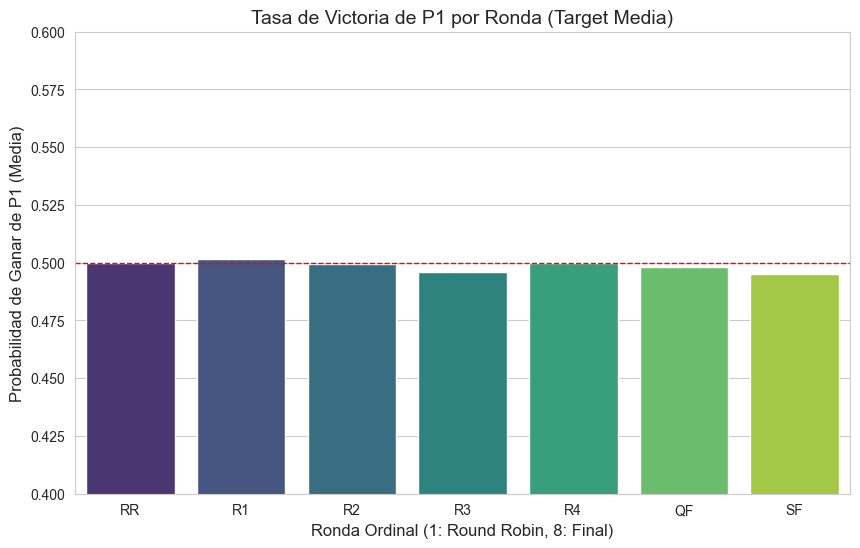

In [37]:
# Calcular la tasa de victoria media por cada ronda
win_rate_by_round = df.groupby('Round_Ordinal')['Target'].mean().reset_index()

# Definir etiquetas para el eje X (para una mejor visualización)
round_labels = {1:'RR', 2:'R1', 3:'R2', 4:'R3', 5:'R4', 6:'QF', 7:'SF', 8:'Final'}

plt.figure(figsize=(10, 6))
sns.barplot(x='Round_Ordinal', y='Target', data=win_rate_by_round, palette='viridis')
plt.title('Tasa de Victoria de P1 por Ronda (Target Media)', fontsize=14)
plt.xlabel('Ronda Ordinal (1: Round Robin, 8: Final)', fontsize=12)
plt.ylabel('Probabilidad de Ganar de P1 (Media)', fontsize=12)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1) # Línea base del 50%
plt.ylim(0.4, 0.6) # Enfocar el eje Y para ver las pequeñas diferencias
plt.xticks(ticks=range(len(win_rate_by_round)), 
           labels=[round_labels.get(r, str(r)) for r in win_rate_by_round['Round_Ordinal']])
plt.show()

In [38]:
#Qué buscar: ¿La Tasa de Victoria se mantiene estable ($\approx 50\%$)?
# Sí. La línea roja de la media ($0.50$) se encuentra en el centro de todas las barras. 
# La variación es mínima (entre $0.49$ y $0.51$).
# Conclusión: Esto valida que:
# El Target está bien balanceado ($\approx 50\%$ de P1 gana).
# La dificultad del torneo es similar en todas las rondas, 
# y tu modelo debe depender de las features de habilidad (Rank_Diff, etc.) para tomar la decisión, no de la ronda en sí misma. 
# La feature Round_Ordinal servirá para modelar la presión o la fatiga creciente, no la probabilidad base de ganar.

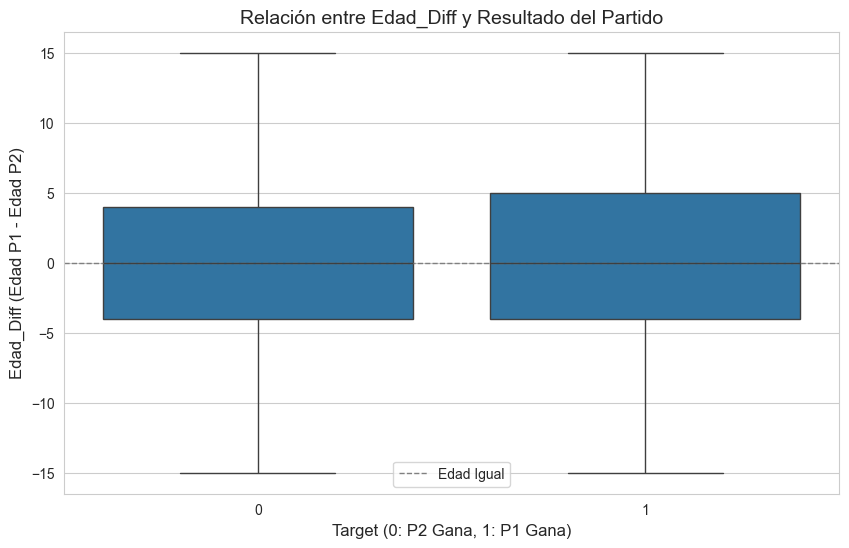

In [39]:
edad_diff_clipped = df['Age_Diff'].clip(lower=-15, upper=15)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y=edad_diff_clipped, data=df)
plt.title('Relación entre Edad_Diff y Resultado del Partido', fontsize=14)
plt.xlabel('Target (0: P2 Gana, 1: P1 Gana)', fontsize=12)
plt.ylabel('Edad_Diff (Edad P1 - Edad P2)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Edad Igual')
plt.legend()
plt.show()

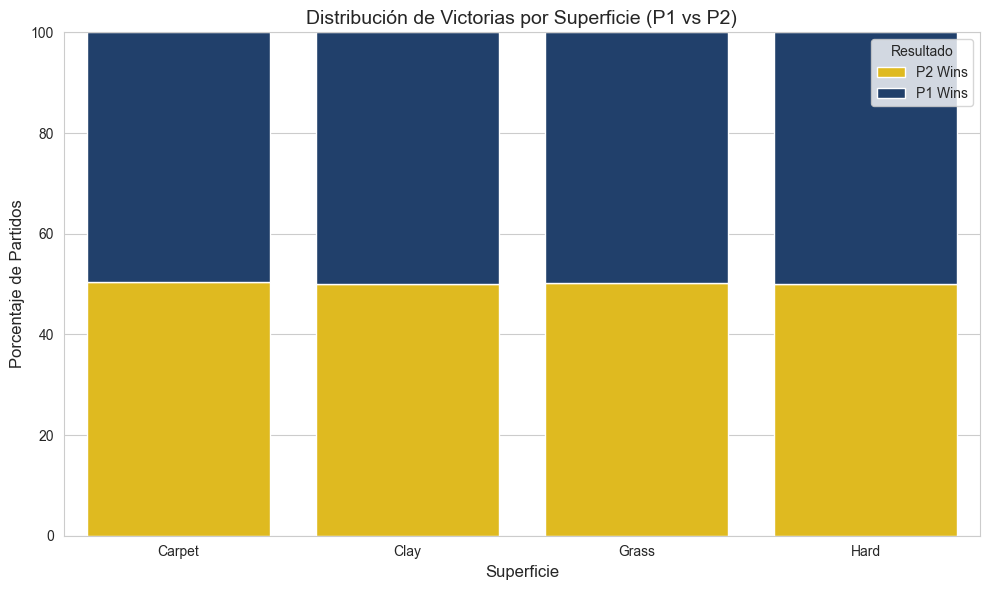

analisis_victorias_por_superficie.png


In [40]:
# 1. Calcular el porcentaje de victorias de P1 (Target=1) para cada superficie
win_pct_surface = df.groupby('Surface')['Target'].agg(['count', 'sum']).reset_index()
win_pct_surface.columns = ['Surface', 'Total_Matches', 'P1_Wins']

# Calcular el porcentaje de victorias de P1 y P2
win_pct_surface['P1_Win_Rate'] = (win_pct_surface['P1_Wins'] / win_pct_surface['Total_Matches']) * 100
win_pct_surface['P2_Win_Rate'] = 100 - win_pct_surface['P1_Win_Rate']

# 2. Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Barra P2 Wins (Base)
sns.barplot(x='Surface', y='P2_Win_Rate', data=win_pct_surface, color='#FFCD00', label='P2 Wins')

# Barra P1 Wins (Apilada)
sns.barplot(x='Surface', y='P1_Win_Rate', data=win_pct_surface, color='#153E77', label='P1 Wins', bottom=win_pct_surface['P2_Win_Rate'])

# Ajustes estéticos y etiquetas
plt.title('Distribución de Victorias por Superficie (P1 vs P2)', fontsize=14)
plt.xlabel('Superficie', fontsize=12)
plt.ylabel('Porcentaje de Partidos', fontsize=12)
plt.legend(title='Resultado', loc='upper right')
plt.ylim(0, 100)
plt.xticks(rotation=0) # Evitar rotación para mejor lectura

plt.tight_layout()
plt.savefig('analisis_victorias_por_superficie.png')
plt.show()

print("analisis_victorias_por_superficie.png")

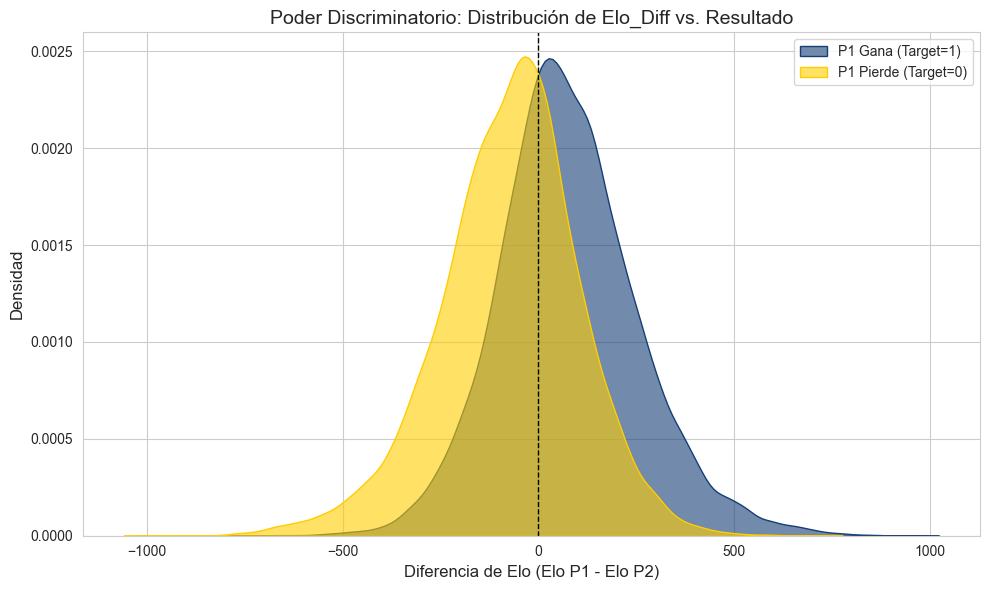

analisis_elo_discriminacion.png


In [ ]:
plt.figure(figsize=(10, 6))

# 1. Distribución cuando P1 Gana (Target=1) - Color Azul
sns.kdeplot(
    data=df[df['Target'] == 1], 
    x='Elo_Diff', 
    fill=True, 
    color='#153E77', 
    alpha=0.6, 
    label='P1 Gana (Target=1)'
)

# 2. Distribución cuando P1 Pierde (Target=0) - Color Amarillo
sns.kdeplot(
    data=df[df['Target'] == 0], 
    x='Elo_Diff', 
    fill=True, 
    color='#FFCD00', 
    alpha=0.6, 
    label='P1 Pierde (Target=0)'
)

# Ajustes estéticos
plt.title('Poder Discriminatorio: Distribución de Elo_Diff vs. Resultado', fontsize=14)
plt.xlabel('Diferencia de Elo (Elo P1 - Elo P2)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1) # Línea en 0 para referencia
plt.legend()
plt.tight_layout()
plt.savefig('analisis_elo_discriminacion.png')
plt.show()

print("analisis_elo_discriminacion.png")

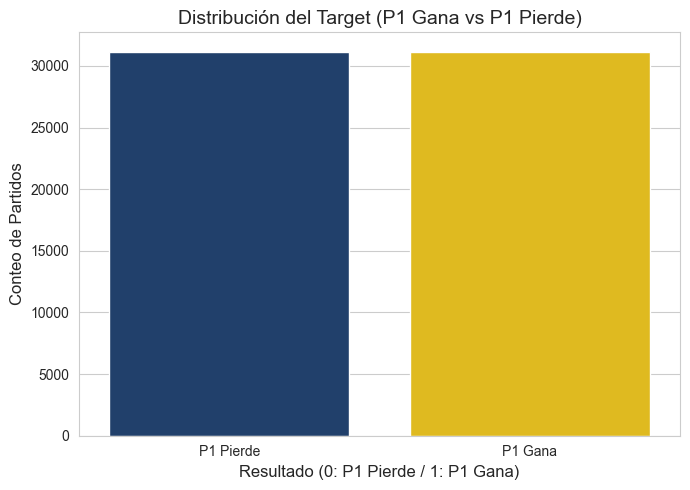

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Target', data=df, palette=['#153E77', '#FFCD00']) 

plt.title('Distribución del Target (P1 Gana vs P1 Pierde)', fontsize=14)
plt.xlabel('Resultado (0: P1 Pierde / 1: P1 Gana)', fontsize=12)
plt.ylabel('Conteo de Partidos', fontsize=12)
plt.xticks([0, 1], ['P1 Pierde', 'P1 Gana']) # Etiquetas claras

plt.tight_layout()